### Importing the required libraries 

In [2]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Paths for the dataset and the model and the tflite

In [3]:
dataset = 'modelc/point_history_classifier/point_history.csv'
model_save_path = 'modelc/point_history_classifier/point_history_classifier.hdf5'
tflite_save_path = 'modelc/point_history_classifier/point_history_classifier.tflite'

#### Defining some of the constants

In [4]:
RANDOM_SEED = 42
NUM_CLASSES = 3
TIME_STEPS = 16
DIMENSION = 2

### Loading datasets and splitting in train and testing datasets

In [6]:
x_dataset = np.loadtxt(dataset, delimiter = ',', dtype = 'float32', usecols = list(range(1, (TIME_STEPS * DIMENSION) + 1)))
y_dataset = np.loadtxt(dataset, delimiter = ',', dtype = 'int32', usecols = (0))
x_train, x_test, y_train, y_test = train_test_split(x_dataset, y_dataset, train_size = 0.75, random_state = RANDOM_SEED)

FileNotFoundError: modelc/point_history_classifier/point_history.csv not found.

(array([0, 1]), array([ 499, 1072], dtype=int64))


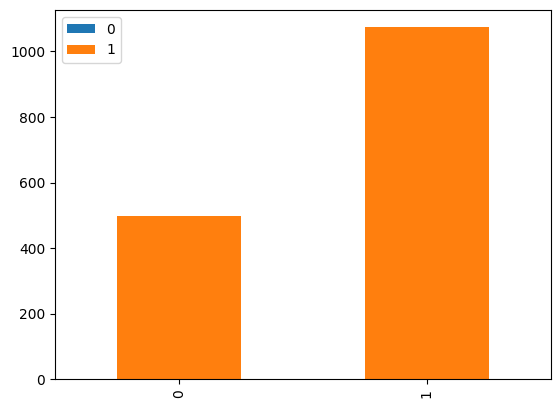

In [ ]:
# count of the classes
counts = np.unique(y_dataset, return_counts = True)
df = pd.DataFrame(counts)
df.T.plot(kind='bar', stacked=True)
print(counts)

### Building the Model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape = (TIME_STEPS * DIMENSION, )),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 24)                792       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                250       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 1,075
Trainable params: 1,075
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Callbacks and Checkpoints
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path,
    verbose = 1,
    save_weights_only = False
)

es_callback = tf.keras.callbacks.EarlyStopping(
    patience = 120,
    verbose = 1
)

In [ ]:
# Compilation of the model
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

### Training the model

In [ ]:
history = model.fit(
    x_train,
    y_train,
    epochs = 1000,
    batch_size = 128,
    validation_data = (x_test, y_test),
    callbacks = [cp_callback, es_callback] 
)

Epoch 1/1000


 1/10 [==>...........................] - ETA: 8s - loss: 1.0613 - accuracy: 0.5156
Epoch 1: saving model to modelc/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 2s 58ms/step - loss: 1.0574 - accuracy: 0.6061 - val_loss: 1.0476 - val_accuracy: 0.7405
Epoch 2/1000
 1/10 [==>...........................] - ETA: 0s - loss: 1.0298 - accuracy: 0.6641
Epoch 2: saving model to modelc/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 0s 9ms/step - loss: 1.0257 - accuracy: 0.6774 - val_loss: 1.0100 - val_accuracy: 0.7710
Epoch 3/1000
 1/10 [==>...........................] - ETA: 0s - loss: 1.0121 - accuracy: 0.7188
Epoch 3: saving model to modelc/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 0s 10ms/step - loss: 0.9895 - accuracy: 0.6978 - val_loss: 0.9652 - val_accuracy: 0.7913
Epoch 4/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.971

In [ ]:
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

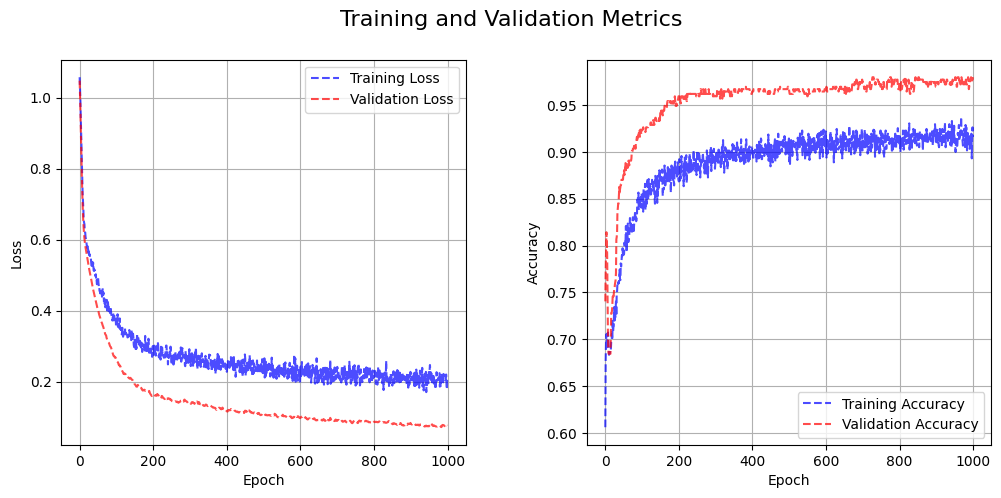

In [ ]:
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.plot(train_loss, label='Training Loss')
# plt.plot(val_loss, label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

# # Plot training and validation accuracy
# plt.subplot(1, 2, 2)
# plt.plot(train_accuracy, label='Training Accuracy')
# plt.plot(val_accuracy, label='Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.show()
import matplotlib.pyplot as plt

# Create a figure with two subplots (loss and accuracy)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot training and validation loss
axes[0].plot(history.history['loss'], label='Training Loss', color='blue', linestyle='--', alpha=0.7)
axes[0].plot(history.history['val_loss'], label='Validation Loss', color='red', linestyle='--', alpha=0.7)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True)

# Plot training and validation accuracy
axes[1].plot(history.history['accuracy'], label='Training Accuracy', color='blue', linestyle='--', alpha=0.7)
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red', linestyle='--', alpha=0.7)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True)

# Add titles
fig.suptitle('Training and Validation Metrics', fontsize=16)
plt.subplots_adjust(wspace=0.3)  # Adjust space between subplots
plt.show()


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Testing Accuracy : {test_accuracy}")
print(f"Testing Loss : {test_loss}")

13/13 [==============================] - 0s 2ms/step - loss: 0.0757 - accuracy: 0.9796
Testing Accuracy : 0.9796437621116638
Testing Loss : 0.07565544545650482


In [ ]:
# Loading the saved model using tesnsorflow
model = tf.keras.models.load_model(model_save_path)

In [ ]:
# Predicting using the model
predict_result = model.predict(np.array([x_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 167ms/step
[1.2032401e-02 9.8796743e-01 2.1847481e-07]
1


### Converting model to Tensorflow-Lite

In [ ]:
model.save(model_save_path, include_optimizer = False)
model = tf.keras.models.load_model(model_save_path)

In [ ]:
# Converting the model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Hi\AppData\Local\Temp\tmpgdlbw8hj\assets


6400